# matplotlibで遊んでみた

In [1]:
import matplotlib.pyplot as plt

ギャラリー
https://matplotlib.org/stable/gallery/index.html


を参考にして色々グラフが書けます　

## broken Barh

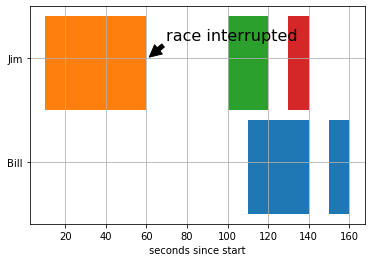

In [2]:
fig, ax = plt.subplots()
ax.broken_barh([(110, 30), (150, 10)], (10, 9), facecolors='tab:blue')
ax.broken_barh([(10, 50), (100, 20), (130, 10)], (20, 9),
               facecolors=('tab:orange', 'tab:green', 'tab:red'))
#ax.set_ylim(5, 35)
#ax.set_xlim(0, 200)
ax.set_xlabel('seconds since start')
ax.set_yticks([15, 25])
ax.set_yticklabels(['Bill', 'Jim'])
ax.grid(True)
ax.annotate('race interrupted', (61, 25),
            xytext=(0.8, 0.9), textcoords='axes fraction',
            arrowprops=dict(facecolor='black', shrink=0.05),
            fontsize=16,
            horizontalalignment='right', verticalalignment='top')

plt.show()

<br>
<Br>
<br>
<br>
<br>
    
# Broken Barhを使ってmatplotlibでQRコードを作ってみよう！！

QRコードを**手書き**するサイトを参考に作りました

https://sites.google.com/a/osshc.co.cc/web/studies/it/qr
（岡崎高校スーパーサイエンス部)

## 作成物

### バージョン1(21×21セル),誤り訂正レベルM(データbit数128bit,誤り訂正80bit)

理由...**~~一番簡単そうだったから~~**


## 手順

### 1.データを符号化する
### 2.誤り訂正符号を作る（リード・ソロモン符号を作成する)
### 3.QRコードに情報を出力する

<br>
<br>
<br>
<br>
<br>

# 1.データを符号化する

予め作っておいた英数字用の変換表を用いて変換します

In [3]:
QR_lib = dict()
with open('lib','r') as f:
    line = f.readline()
    while line:
        s = line.split(",")
        QR_lib[s[0]] = int(s[1])
        line = f.readline()

In [4]:
QR_lib

{'0': 0,
 '1': 1,
 '2': 2,
 '3': 3,
 '4': 4,
 '5': 5,
 '6': 6,
 '7': 7,
 '8': 8,
 '9': 9,
 'A': 10,
 'B': 11,
 'C': 12,
 'D': 13,
 'E': 14,
 'F': 15,
 'G': 16,
 'H': 17,
 'I': 18,
 'J': 19,
 'K': 20,
 'L': 21,
 'M': 22,
 'N': 23,
 'O': 24,
 'P': 25,
 'Q': 26,
 'R': 27,
 'S': 28,
 'T': 29,
 'U': 30,
 'V': 31,
 'W': 32,
 'X': 33,
 'Y': 34,
 'Z': 35,
 ' ': 36,
 '$': 37,
 '%': 38,
 '*': 39,
 '+': 40,
 '-': 41,
 '.': 42,
 '/': 43,
 ':': 44}

In [5]:
name = 'HARAGOD'

In [6]:
def bitmaker(QR_lib,name):
    odd_flag = False
    name_len = len(name)
    name_binary = ''
    umekusa_flag = True
    
    if name_len > 15:
        print("length over")
        return
    if name_len%2 == 1:
        odd_flag = True
    
    # 'QR_lib'から変換して11bitのbinaryにする
    for i in range(int(len(name)/2)):
        b = format(QR_lib[name[i*2]]*45+QR_lib[name[i*2+1]],'b')
        while len(b) < 11:
            b = '0' + b
        name_binary += b 
    
    # 文字数が奇数の時は最後だけ6bitにする
    if odd_flag == True:
        b = format(QR_lib[name[len(name)-1]],'b')
        while len(b) < 6:
            b = '0' + b
        name_binary += b
        
    # モード指示子と文字数指示子,終端パターンの付与
    name_binary = '0010' + '000001111' + name_binary + '0000'
    
    # (8の倍数)bitになるまで終端に'0'を付与
    while len(name_binary)%8 != 0:
        name_binary += '0'
    
    # 128bit(16コード語)になるまで埋め草コードを付与
    while len(name_binary) < 128: 
        if umekusa_flag == True:
            name_binary += '11101100'
            umekusa_flag = False
        else:
            name_binary += '00010001'
            umekusa_flag = True
    return name_binary

In [7]:
bitIx = bitmaker(QR_lib,name)

In [8]:
bitIx

'00100000011110110000011110011001001010111010000011010000111011000001000111101100000100011110110000010001111011000001000111101100'

<br>
<br>
<br>

## 2.誤り訂正符号を作る

QRコードの誤り訂正方式

QRコードの情報符号...
$x^8+x^4+x^3+x^2+1$を原始多項式とする$2^8$のガロア拡大体を用いてリード・ソロモン符号を作成する


リード・ソロモン符号については[wikipedia](https://ja.wikipedia.org/wiki/%E3%83%AA%E3%83%BC%E3%83%89%E3%83%BB%E3%82%BD%E3%83%AD%E3%83%A2%E3%83%B3%E7%AC%A6%E5%8F%B7)が詳しい
<br>
<br>
<br>
<br>
<br>

## 体論（数学）の知識が必要になります
    

### ガロア体
四則演算が定義され閉じている有限集合のこと.体,とは四則演算が定義される集合のこと
<br>
<br>
(有理数は体を成すが,整数は体をなさない)


#### 構成例（wikipedia「有限体」より)
[リンク](https://ja.wikipedia.org/wiki/%E6%9C%89%E9%99%90%E4%BD%93#:~:text=%E6%9C%89%E9%99%90%E4%BD%93%EF%BC%88%E3%82%86%E3%81%86%E3%81%92%E3%82%93%E3%81%9F%E3%81%84%E3%80%81%E8%8B%B1%E8%AA%9E,%E9%9B%86%E5%90%88%E3%81%AE%E3%81%93%E3%81%A8%E3%81%A7%E3%81%82%E3%82%8B%E3%80%82)


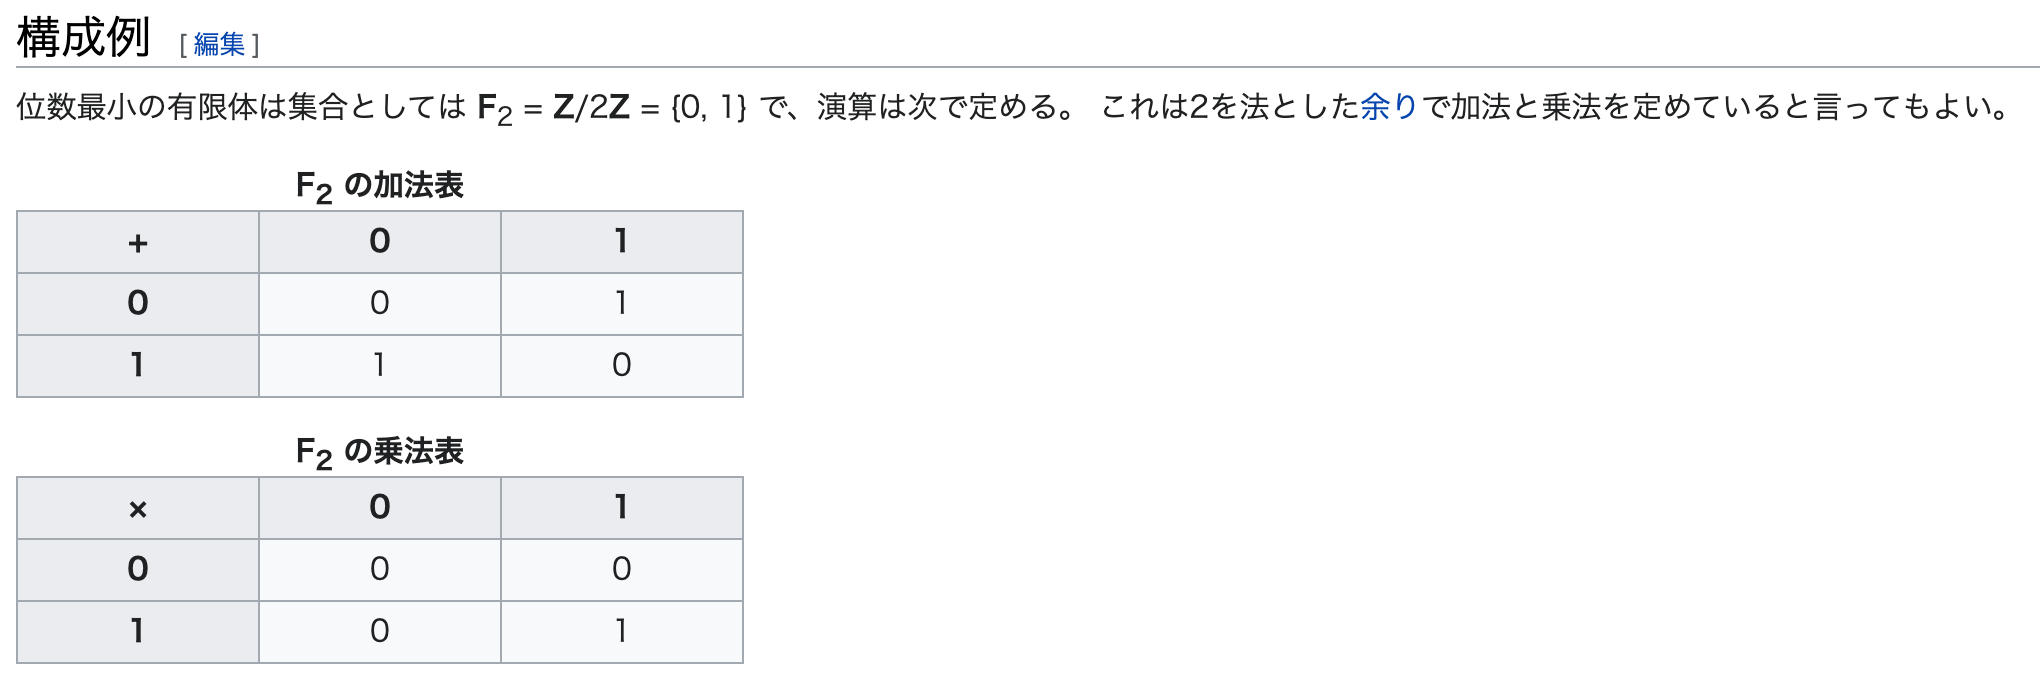


### ガロア拡大体
$p^r$(pは素数)を法としたガロア体は,GF($p$)に**原始多項式**と呼ばれる方程式の根を付加することで実現できる.

#### ざっくり言うと


1コード語=8bitが取りうる数字→256


$f(x) = x^8+x^4+x^3+x^2+1$ ($x= 0or1$) の256個の解($α^0,α^1,...,α^{255}$)とコード語を対応させ,さらにその中で四則演算が定義できる

### bit表示から冪乗表示に変換する関数（時間の都合上割愛)

In [9]:
def Bin_Galois(bit_8):
    if len(bit_8) != 8:
        print("length_error")
        return 
    vector_power = [0]*256
    for j in range(len(bit_8)):
        vector_power[j] = int(bit_8[7-j])
    
    zero_num = -1
    second_one_flag = False
    i = 0
    while i < 256:
        if vector_power[i] == 0:
            i += 1
            continue
        if vector_power[i] == 1 and second_one_flag == False:
            second_one_flag = True
            zero_num = i
            i += 1
            continue
        if vector_power[i] == 1 and second_one_flag == True:
            vector_power[zero_num] += 1
            vector_power[zero_num + 2] += 1
            vector_power[zero_num + 3] += 1
            vector_power[zero_num + 4] += 1
            vector_power[zero_num + 8] += 1
            for k in range(256):
                if vector_power[k] == 2:
                    vector_power[k] = 0
            second_one_flag = False
            i = zero_num + 1
            
    return zero_num

### 冪乗表示からbit表示に変換する関数（時間の都合上割愛)

In [10]:
def Galois_Bin(power):
    if type(power) is not int:
        print('invalid type')
        return
    if power == -1:
        return '00000000'
    power = power % 255
    vector_power = [0]*256
    vector_power[power] = 1
    
    i = 255
    while i > 7:
        if vector_power[i] == 0:
            i -= 1
            continue
        
        vector_power[i] += 1
        vector_power[i-4] += 1
        vector_power[i-5] += 1
        vector_power[i-6] += 1
        vector_power[i-8] += 1
        for k in range(256):
                if vector_power[k] == 2:
                    vector_power[k] = 0
                    
    binary = ''
    for j in range(8):
        binary = str(vector_power[j]) + binary
        
    return binary

In [11]:
def vector_Ix(bitIx):
    powerIx = []
    for i in range(int(len(bitIx)/8)):
        bit_8 = bitIx[i:i+8] 
        power = Bin_Galois(bit_8)
        powerIx.append(power)
    return powerIx

In [12]:
Ix = vector_Ix(bitIx)

In [13]:
Ix

[5, 6, 112, 25, 198, 75, 76, 228, 172, 173, 122, 251, 242, 30, 45, 247]

$Ix = α^5x^{25}+α^6x^{24}+α^{112}x^{23}+α^{25}x^{22}+α^{198}x^{21}+α^{75}x^{20}+α^{76}x^{19}+α^{228}x^{18}+α^{172}x^{17}+α^{232}x^{16}+α^{44}x^{15}+α^{204}x^{14}+α^{57}x^{13}+α^{10}x^{12}+α^{11}x^{11}+α^{161}x^{10}$

In [14]:
Gx = [0,251,67,46,61,118,70,64,94,32,45]

$Gx = x^{10} + α^{251}x^9 + α^{67}x^8 + α^{46}x^7 + α^{61}x^6 + α^{118}x^5 + α^{70}x^4 + α^{64}x^3 + α^{94}x^2 + α^{32}x^1 +α^{45}$

### Ixにおいて,Gxのmodを取る

In [15]:
def Ix_mod_Gx(Ix,Gx):
    Px = Ix.copy()
    for _ in range(len(Gx)-1):
        Px.append(-1)
    
    i = 0
    while (i + len(Gx)) <= len(Px):
        G = Gx.copy() #計算用に変数で置く
        for j in range(len(Gx)):
            G[j] += Px[i]
        for j in range(len(Gx)):
            bit_8a = Galois_Bin(Px[i+j])
            bit_8b = Galois_Bin(G[j])
            bit_8c = ex_and(bit_8a,bit_8b)
            Px[i+j] = Bin_Galois(bit_8c)
        i += 1
    
    bit_Px = ''
    for k in range(len(Gx)-1):
        power = Px[len(Ix) + k]
        bit_8 = Galois_Bin(power)
        bit_Px += bit_8
        
    return bit_Px

In [16]:
def ex_and(bit_8a,bit_8b):#排他的論理和の計算
    bit_8c = ''
    if len(bit_8a) != len(bit_8b):
        print('length_error')
        return
    for i in range(len(bit_8a)):
        x = int(bit_8a[i]) + int(bit_8b[i])
        if x == 2:
            x = 0
        bit_8c += str(x)
    return bit_8c

In [17]:
bitPx = Ix_mod_Gx(Ix,Gx)

In [18]:
Reed_Solomon = bitIx + bitPx
format_info = '101000100100101'

In [19]:
Reed_Solomon

'0010000001111011000001111001100100101011101000001101000011101100000100011110110000010001111011000001000111101100000100011110110010000100011000001011000010110101100110110000011110101000010110010111000000011110'

# 3.QRコードに情報を埋め込む

### QRコードの情報記述領域
（岡崎高校スーパーサイエンス部HPより)

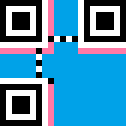

In [20]:
def makeQRmatrix(Reed_Solomon,format_info):
    #変数の初期化
    QR_mat = [[0 for _ in range(21)] for __ in range(21)]
    up_flag =  False
    bit_index = 0
    #情報部分
    for i in range(5):
        up_flag = not up_flag
        for j in range(3):
            if up_flag == True:
                for l in range(4):
                    QR_mat[20-j*4-3+l][20-i*2-1] = int(Reed_Solomon[bit_index+l*2]) 
                    QR_mat[20-j*4-3+l][20-i*2] = int(Reed_Solomon[bit_index+l*2+1]) 
            if up_flag == False:
                for l in range(4):
                    QR_mat[9+j*4+3-l][20-i*2-1] = int(Reed_Solomon[bit_index+l*2])
                    QR_mat[9+j*4+3-l][20-i*2] = int(Reed_Solomon[bit_index+l*2+1]) 
            bit_index += 8
    for l in range(4):
        if l < 2:
            QR_mat[4+l][11] = int(Reed_Solomon[bit_index + l*2])
            QR_mat[4+l][12] = int(Reed_Solomon[bit_index + l*2+1])
        else:
            QR_mat[5+l][11] = int(Reed_Solomon[bit_index + l*2])
            QR_mat[5+l][12] = int(Reed_Solomon[bit_index + l*2+1])
    bit_index += 8
    for l in range(4):
        QR_mat[l][11] = int(Reed_Solomon[bit_index + l*2])
        QR_mat[l][12] = int(Reed_Solomon[bit_index + l*2+1])
    bit_index += 8
    up_flag = not up_flag
    for l in range(4):
        QR_mat[3-l][9] = int(Reed_Solomon[bit_index + l*2])
        QR_mat[3-l][10] = int(Reed_Solomon[bit_index + l*2+1])
    bit_index += 8
    for l in range(4):
        if l < 2:
            QR_mat[8-l][9] = int(Reed_Solomon[bit_index + l*2])
            QR_mat[8-l][10] = int(Reed_Solomon[bit_index + l*2+1])
        else:
            QR_mat[7-l][9] = int(Reed_Solomon[bit_index + l*2])
            QR_mat[7-l][10] = int(Reed_Solomon[bit_index + l*2+1])
    bit_index += 8
    for j in range(3):
        for l in range(4):
            QR_mat[9+j*4+3-l][9] = int(Reed_Solomon[bit_index + l*2])
            QR_mat[9+j*4+3-l][10] = int(Reed_Solomon[bit_index + l*2+1])
        bit_index += 8
    up_flag = not up_flag
    for l in range(4):
        QR_mat[9+l][7] = int(Reed_Solomon[bit_index + l*2])
        QR_mat[9+l][8] = int(Reed_Solomon[bit_index + l*2+1])
    bit_index += 8
    
    for i in range(3):
        up_flag = not up_flag
        if up_flag == True:
            for l in range(4):
                QR_mat[9+l][5-i*2-1] = int(Reed_Solomon[bit_index+l*2]) 
                QR_mat[9+l][5-i*2] = int(Reed_Solomon[bit_index+l*2+1]) 
        if up_flag == False:
            for l in range(4):
                QR_mat[12-l][5-i*2-1] = int(Reed_Solomon[bit_index+l*2])
                QR_mat[12-l][5-i*2] = int(Reed_Solomon[bit_index+l*2+1])
        bit_index += 8
    # マスキング
    for i in range(21):
        for j in range(21):
            if i%2 == 0:
                x = QR_mat[i][j] + 1
                QR_mat[i][j] = x % 2
   
    # 基本配置
    QR_mat[0][0:8] = [1,1,1,1,1,1,1,0]
    QR_mat[0][13:21] = [0,1,1,1,1,1,1,1]
    QR_mat[1][0:8] = [1,0,0,0,0,0,1,0]
    QR_mat[1][13:21] = [0,1,0,0,0,0,0,1]
    for i in range(2,5):
        QR_mat[i][0:8] = [1,0,1,1,1,0,1,0]
        QR_mat[i][13:21] = [0,1,0,1,1,1,0,1]
    QR_mat[5][0:8] = [1,0,0,0,0,0,1,0]
    QR_mat[5][13:21] = [0,1,0,0,0,0,0,1]    
    QR_mat[6] = [1,1,1,1,1,1,1,0,1,0,1,0,1,0,1,1,1,1,1,1,1]
    for j in range(8):
        QR_mat[7][j] = 0
    for j in range(13,21):
        QR_mat[7][j] = 0
        
    QR_mat[8][6] = 1
    QR_mat[9][6] = 0
    QR_mat[10][6] = 1
    QR_mat[11][6] = 0
    QR_mat[12][6] = 1
    
    QR_mat[13][0:9] = [0,0,0,0,0,0,0,0,1]
    QR_mat[14][0:8] = [1,1,1,1,1,1,1,0]
    QR_mat[15][0:8] = [1,0,0,0,0,0,1,0]
    for i in range(16,19):
        QR_mat[i][0:8] = [1,0,1,1,1,0,1,0]
    QR_mat[19][0:8] = [1,0,0,0,0,0,1,0]
    QR_mat[20][0:8] = [1,1,1,1,1,1,1,0]
    
    # 形式情報
    format_index = 0
    for j in range(7):
        QR_mat[20-j][8] = int(format_info[format_index])
        format_index += 1
    
    for i in range(13,21):
        QR_mat[8][i] = int(format_info[format_index])
        format_index += 1
    
        
    
    format_index = 0
    for i in range(6):
        QR_mat[8][i] = int(format_info[format_index])
        format_index += 1
    QR_mat[8][7] = int(format_info[format_index])
    format_index += 1
    QR_mat[8][8] = int(format_info[format_index])
    format_index += 1
    QR_mat[7][8] = int(format_info[format_index])
    format_index += 1
    for j in range(6):
        QR_mat[5-j][8] = int(format_info[format_index])
        format_index += 1
    
    return QR_mat

In [21]:
QR_mat = makeQRmatrix(Reed_Solomon,format_info)

In [22]:
QR_mat

[[1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1],
 [1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1],
 [1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1],
 [1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1],
 [1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1],
 [1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1],
 [1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0],
 [1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1],
 [1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
 [0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1],
 [0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1],
 [1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1],
 [1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0],
 [1, 0, 0,

In [23]:
def glaphplot(QR_mat):
    fig, ax = plt.subplots()
    for i in range(21):
        for j in range(21):
            if QR_mat[i][j] == 1:
                ax.broken_barh([(j,1)], (21-i,1), facecolors='black')#出力の際に行列を上下反転させることに注意

    ax.set_ylim(-10, 31)
    ax.set_xlim(-10, 31)
    ax.set_aspect('equal')#四角くする
    ax.grid(False)


    plt.show()
    fig.savefig('image1.png')

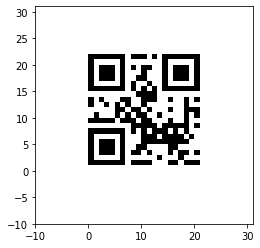

In [24]:
glaphplot(QR_mat)

### ヒートマップを使って再度やってみる

In [25]:
def drowheatmap(QR_mat):
    data = [[0 for _ in range(21)] for __ in range(21)]
    for i in range(21):
        data[i]  = QR_mat[20-i].copy()
        
    fig, ax = plt.subplots()
    heatmap = ax.pcolor(data, cmap=plt.cm.Blues)
    
    ax.set_ylim(-10, 31)
    ax.set_xlim(-10, 31)
    ax.set_aspect('equal')
    
    plt.show()
    fig.savefig('image2.png')

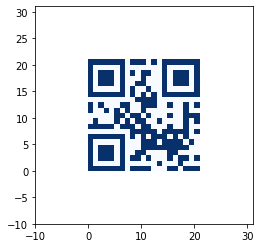

In [26]:
drowheatmap(QR_mat)

# 解決策

# QRコードモジュールを使う

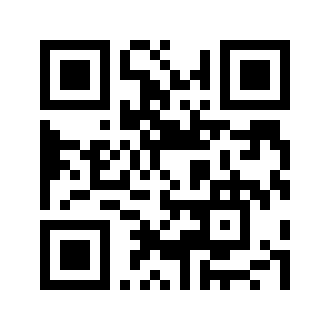

In [27]:
import qrcode
link = 'https://xxgentaroxx.com/'

qrcode.make(link)